In [1]:
import nltk

In [2]:
from nltk.corpus import twitter_samples 

In [3]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\alami\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [6]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alami\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
def process_tweet(tweet, tokenizer,stemmer):
    tweet = re.sub(r'(http|https)?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#','', tweet)
    tweet = re.sub(r'\n', ' ', tweet)
    tweet = re.sub(r'@\w+ ', '', tweet)
    tweet = tweet.lower()
    tokens = tokenizer.tokenize(tweet)
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    tokens = [token for token in tokens if token not in string.punctuation]
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens
    

In [9]:
import numpy as np

In [10]:
tweets = positive_tweets + negative_tweets

In [11]:
tweets = np.array(tweets)

In [12]:
tweets.shape

(10000,)

In [13]:
labels = np.append(np.ones(5000), np.zeros(5000))
labels.shape

(10000,)

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3)

In [17]:
X_train.shape

(7000,)

In [18]:
X_test.shape

(3000,)

In [19]:
frequencies = {'happy': (50,20,0.7), 'sad' : (10,12,-0.9)}

In [20]:
frequencies

{'happy': (50, 20, 0.7), 'sad': (10, 12, -0.9)}

In [21]:
frequencies.get('happy')

(50, 20, 0.7)

In [23]:
frequencies.get('like', (0,0,0))

(0, 0, 0)

In [24]:
frequencies = {}

In [26]:
sum_pos_freq = 0
sum_neg_freq = 0

In [27]:
vocabulary = set()

In [28]:
tokenizer = TweetTokenizer()

In [29]:
stemmer = PorterStemmer()

In [30]:
for tweet, label in zip(X_train, y_train):
    for token in process_tweet(tweet, tokenizer, stemmer):
        vocabulary.add(token)
        pos_freq_count = frequencies.get(token, (0,0,0))[0]
        neg_freq_count = frequencies.get(token, (0,0,0))[1]
        if label == 1.0:
            pos_freq_count +=1
            sum_pos_freq +=1
        else:
            neg_freq_count += 1
            sum_neg_freq += 1
        frequencies[token] = (pos_freq_count, neg_freq_count, 0)    
        

In [31]:
print(frequencies)

{'chloe': (2, 2, 0), 'watch': (33, 47, 0), 'let': (56, 28, 0), 'yesterday': (7, 12, 0), 'realli': (50, 89, 0), 'awesom': (36, 3, 0), 'talent': (4, 2, 0), 'intellig': (3, 0, 0), 'actress': (2, 0, 0), 'beauti': (40, 5, 0), ':)': (2490, 2, 0), 'love': (284, 105, 0), 'u': (118, 139, 0), ':-(': (0, 342, 0), 'hello': (44, 10, 0), 'get': (150, 177, 0), 'youth': (17, 0, 0), 'job': (29, 11, 0), 'opportun': (20, 0, 0), 'follow': (265, 209, 0), '@alettapetro': (1, 0, 0), 'prob': (4, 2, 0), 'fun': (37, 24, 0), 'david': (1, 1, 0), 'thankyou': (12, 1, 0), '@lastminuteusvac': (1, 0, 0), 'like': (160, 150, 0), 'wonder': (24, 8, 0), 'origin': (5, 4, 0), 'recip': (3, 0, 0), 'share': (36, 8, 0), 'foiegra': (2, 0, 0), 'lover': (4, 0, 0), 'worri': (12, 5, 0), 'understand': (5, 11, 0), ':(': (1, 3205, 0), 'mean': (15, 27, 0), 'total': (8, 6, 0), 'peopl': (36, 46, 0), 'block': (3, 7, 0), 'other': (7, 6, 0), "that'": (51, 46, 0), 'choic': (6, 4, 0), 'sometim': (10, 13, 0), 'want': (65, 179, 0), 'friend': (42,

In [32]:
frequencies.get('good')

(169, 70, 0)

In [33]:
frequencies.get('bad')

(14, 52, 0)

In [34]:
sum_pos_freq

23983

In [35]:
sum_neg_freq

23578

In [36]:
len(vocabulary)

8544

In [37]:
import math

In [39]:
for token in frequencies:
    pos_freq_count = frequencies.get(token, (0,0,0))[0]
    neg_freq_count = frequencies.get(token, (0,0,0))[1]
    pos_prob = (pos_freq_count + 1) / (sum_pos_freq + len(vocabulary))
    neg_prob = (neg_freq_count + 1) / (sum_neg_freq + len(vocabulary))
    lamda = math.log10(pos_prob / neg_prob)
    frequencies[token] = (pos_prob, neg_prob, lamda)
    

In [40]:
print(frequencies)

{'chloe': (9.223106957297015e-05, 9.339393562044705e-05, -0.005441431921941838), 'watch': (0.0010452854551603284, 0.0014943029699271528, -0.1552037522552739), 'let': (0.0017523903218864328, 0.0009028080443309882, 0.2880354258515935), 'yesterday': (0.00024594951886125374, 0.00040470705435527053, -0.21629479723683495), 'realli': (0.0015679281827404926, 0.0028018180686134116, -0.25211376526333035), 'awesom': (0.0011375165247332986, 0.00012452524749392938, 0.9607003008170908), 'talent': (0.0001537184492882836, 9.339393562044705e-05, 0.2164073176944145), 'intellig': (0.00012297475943062687, 3.1131311873482345e-05, 0.5966185594060206), 'actress': (9.223106957297015e-05, 3.1131311873482345e-05, 0.4716798227977207), 'beauti': (0.0012604912841639253, 0.0001867878712408941, 0.82919117441415), ':)': (0.07658253143542287, 9.339393562044705e-05, 2.913811040894902), 'love': (0.008761951609432163, 0.003299919058589129, 0.4240975628217981), 'u': (0.003658499093061149, 0.004358383662287529, -0.07602250

In [41]:
frequencies.get('good')

(0.005226427275801642, 0.0022103231430172466, 0.37374914073725685)

In [42]:
frequencies.get('bad')

(0.00046115534786485073, 0.0016499595292945644, -0.5536260424670496)

In [43]:
frequencies.get('lost')

(6.148737971531343e-05, 0.0003735757424817882, -0.7835926823055855)

In [44]:
frequencies.get('win')

(0.00043041165800719404, 0.0006537575493431293, -0.18153269097762303)

In [46]:
features = np.zeros((X_train.size, 3))

In [47]:
features.shape

(7000, 3)

In [53]:
for i in range(len(X_train)):
    pos_log_likelyhood = 0
    neg_log_likelyhood = 0
    for token in process_tweet(X_train[i], tokenizer, stemmer):
        log_likelyhood = frequencies.get(token, (0,0,0))[2]
        if log_likelyhood > 0:
            pos_log_likelyhood += log_likelyhood
        else:
            neg_log_likelyhood += log_likelyhood
        features[i,:] = [pos_log_likelyhood, neg_log_likelyhood, y_train[i]]    

In [54]:
features

array([[ 6.27644364, -0.88116751,  1.        ],
       [ 0.42409756, -2.61675806,  0.        ],
       [ 6.87210642, -0.07688449,  1.        ],
       ...,
       [ 0.        , -4.88678207,  0.        ],
       [ 0.        , -3.34075512,  0.        ],
       [ 0.        , -3.73869513,  0.        ]])

In [55]:
import matplotlib.pyplot as plt

In [56]:
np.max(features)

35.762195901383734

In [57]:
np.min(features)

-39.700576567784964

<function matplotlib.pyplot.show(close=None, block=None)>

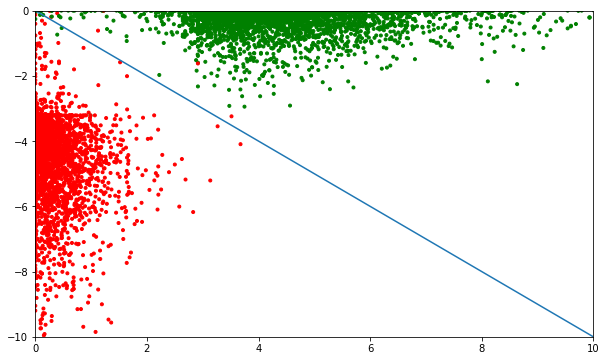

In [67]:
colors = ['red', 'green']
plt.figure(figsize=(10,6))
plt.axis([0,10,-10,0])
plt.scatter(features[:,0], features[:,1], c=[colors[int(i)] for i in features[:,2]],  marker = '.')
plt.plot([0,10],[0,-10])
plt.show

In [69]:
log_prior = np.count_nonzero(y_train) / (y_train.size - np.count_nonzero(y_train))

In [70]:
correct_predictions_count = 0
for tweet, label in zip(X_test, y_test):
    log_likelyhood = 0
    for token in process_tweet(tweet, tokenizer,stemmer):
        log_likelyhood += frequencies.get(token, (0,0,0))[2]
    inference = log_prior + log_likelyhood
    if inference >= 1 and label == 1.0:
        correct_predictions_count += 1
    elif inference < 1 and label == 0.0:
        correct_predictions_count += 1

In [71]:
correct_predictions_count

2977

## percentage of accuracy prediction

In [72]:
correct_predictions_count / y_test.size

0.9923333333333333